In [3]:
from utils.DataUtils import DataUtils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_utils = DataUtils()
data = ['adbecg', 'nifecg', 'synt_ecg']

# # ADBECG
adbecg = data_utils.get_data(dataset='adbecg')
adbecg_record = data_utils.open_record(next(adbecg))
print(adbecg_record.shape)
# # # NIFECG
nifecg = data_utils.get_data(dataset='nifecg')
nifecg_record = data_utils.open_record(next(nifecg))
# # SYNT_ECG

# synt_ecg = data_utils.get_data(dataset='synt_ecg')
# synt_ecg_record = data_utils.open_record(next(synt_ecg))


Reading edf file: ../data\adbecg\r01.edf


AttributeError: 'EdfReader' object has no attribute 'shape'

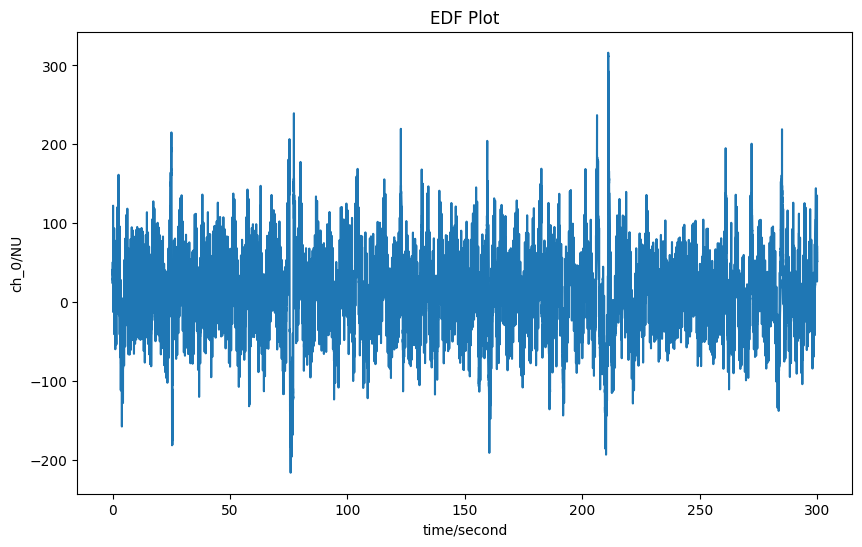

NameError: name 'nifecg_record' is not defined

In [ ]:
import wfdb

channels = [0, 1]  # plot the first two channels

# Plot the selected channels
wfdb.plot_items(signal=adbecg_record,
                fs=1000,
                title='EDF Plot',
                time_units='seconds',
                figsize=(10, 6))

# Show the plot
plt.show()


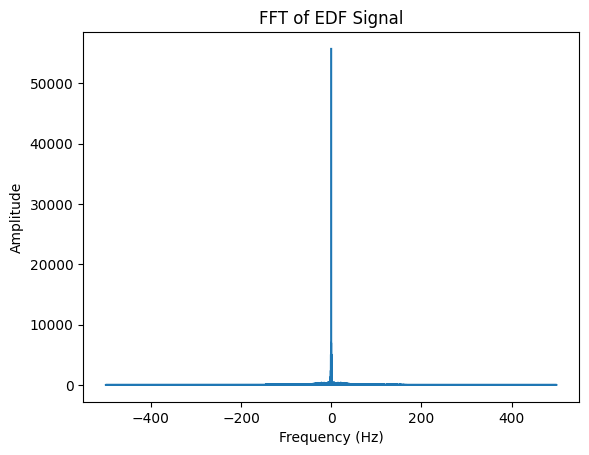

In [ ]:
from SignalPreProcessor import normalize
channel = 0
signal = normalize(adbecg_record)
fs = 1000
# Calculate the FFT of the signal
fft = np.fft.fft(signal)

# Calculate the frequency bins corresponding to the FFT output
freqs = np.fft.fftfreq(len(signal), 1.0/fs)

# Plot the FFT output
plt.plot(freqs, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of EDF Signal')
plt.show()

(250,)
(126,) (1,) (126, 1)


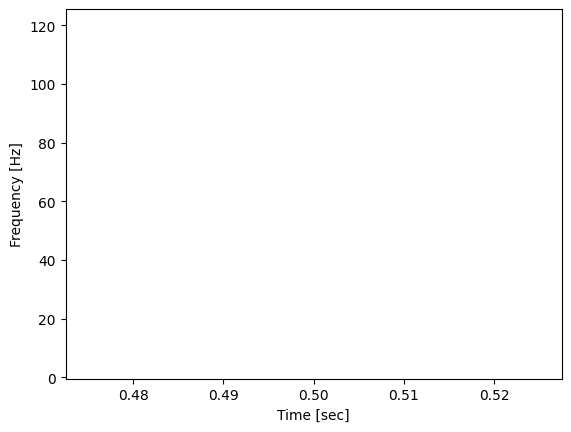

In [36]:
from scipy import signal
import numpy as np

# Get the signal data from the selected channel
_signal = adbecg_record.readSignal(1)

# Define the parameters for segmenting the signal and calculating the spectrogram
fs = 1000  # 1000Hz sampling frequency
segment_size = int(0.25 * fs)  # 250ms segment size
overlap_size = int(0.01 * fs)  # 10ms overlap size
window = signal.windows.hamming(segment_size)  # Hamming window

# Segment the signal and calculate the spectrogram for each segment
spectrograms = []
segments = []
for i in range(0, len(_signal) - segment_size, segment_size - overlap_size):
  segments.append(_signal[i:i+segment_size] * window)   # apply the window to the segment

segments = np.array(segments)
print(segments[0].shape)
freq, time, stft_data = signal.spectrogram(segments[0], fs=250, window=window, nperseg=segment_size, noverlap=overlap_size, nfft=segment_size, return_onesided=True, scaling='spectrum', axis=-1, mode='psd')

print(freq.shape, time.shape, stft_data.shape)
# Plot the spectrogram
plt.pcolormesh(time, freq, np.log10(stft_data))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()




(126,) (1,) (126, 1)


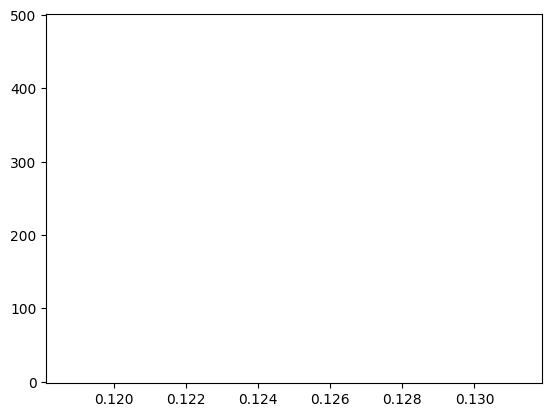

In [22]:
# Show the plot
# Calculate the spectrogram of the signal
index: int = 0
# Define the parameters for segmenting the signal and calculating the spectrogram
segment_size = int(0.25 * fs)  # 250ms segment size
overlap_size = int(0.01 * fs)  # 10ms overlap size
window = signal.windows.hamming(segment_size)  # Hamming window

# for segment in segments:
f, t, Sxx = signal.spectrogram(segments[0], fs=1000, window=window)
print(f.shape, t.shape, Sxx.shape)

index += 1
# Plot the spectrogram
plt.pcolormesh(t, f, np.log10(Sxx))
# plt.xlabel('Time (ms)')
# plt.ylabel('Frequency (Hz)')
# plt.title('Spectrogram of EDF Signal')
# plt.colorbar()
plt.show()

In [2]:
data_path = '../data/nifecg/RECORDS.txt'
with open(data_path, 'rb') as f:
    lines = f.read()
lines

b'ecgca102.edf\necgca115.edf\necgca127.edf\necgca154.edf\necgca192.edf\necgca244.edf\necgca252.edf\necgca274.edf\necgca290.edf\necgca300.edf\necgca308.edf\necgca323.edf\necgca368.edf\necgca384.edf\necgca392.edf\necgca410.edf\necgca416.edf\necgca436.edf\necgca444.edf\necgca445.edf\necgca473.edf\necgca515.edf\necgca571.edf\necgca585.edf\necgca595.edf\necgca597.edf\necgca621.edf\necgca629.edf\necgca649.edf\necgca659.edf\necgca699.edf\necgca711.edf\necgca733.edf\necgca746.edf\necgca748.edf\necgca771.edf\necgca776.edf\necgca811.edf\necgca816.edf\necgca826.edf\necgca840.edf\necgca848.edf\necgca864.edf\necgca868.edf\necgca876.edf\necgca880.edf\necgca886.edf\necgca896.edf\necgca900.edf\necgca902.edf\necgca906.edf\necgca968.edf\necgca986.edf\necgca997.edf\necgca998.edf\n'

In [4]:
data = ['adbecg', 'nifecg', 'synt_ecg']
data_utils = DataUtils()

# # ADBECG
adbecg = data_utils.get_data(dataset='adbecg')

In [7]:
data = {} # create an empty dictionary to store the segments for each record
metadata = [] # create an empty list to store the metadata for each record

for record in adbecg:
    record_id = (record.split('/')[-1][1:3])
    record_signal = data_utils.open_record(record)
    record_segments = {record_id: {'abdominal': {}, 'fetal': {}}}

    for chn in range(0, len(record_signal.getSampleFrequencies())):
        channel_name = record_signal.getSignalLabels()[chn]
        print('Reading channel: {}'.format(channel_name))
        _signal = record_signal.readSignal(chn)
        print(_signal)
    #     segments = []
    #     segments_index = 0

    #     for i in range(0, len(_signal) - segment_size, segment_size - overlap_size):
    #         segment = _signal[i:i+segment_size] * window
    #         segments.append(segment)
    #     print(segments)
    